# 0. Pseudo Code

1. Agent observes the current state (s)
2. Agent selects action a  based on policy π. Therefore a = π(s) to balance a pole over the cart.
3. Environment returns:
   - reward r
   - new state s'
   - done (is episode over?)
4. Agent uses this info to learn/improve


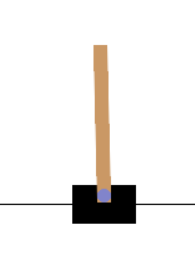

# 1. Imports

In [17]:
import gymnasium  as gym 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# 2. Define Simulation Params & Render Mode

In [18]:
n_episodes = 10
render_mode = "human"

In [19]:
if n_episodes > 100:
    render_mode = None

# 3. Create an environment in gym

In [20]:
env_random = gym.make("CartPole-v1", render_mode=render_mode)
env_right = gym.make("CartPole-v1", render_mode=render_mode)

# 4. Define the simulation loop for a random agent that acts as a baseline

In [21]:
def simulate_random_agent(env, n_episodes: int = 10):
    
    # Define the episode tracker list 
    episode_tracker = {}

    # Define the Episode simulation loop
    for episode in tqdm(range(n_episodes)):
        
        # Get the start state after reseting the environment
        # Define the termination parameter as false
        # Deffine the total reward for the episode as 0
        state, _ = env.reset()
        done = False
        total_reward = 0

        # Keep a tracker for each episode that can be used to view the specific episodes trajectory
        episode_states = []
        episode_actions = []
        episode_rewards = []

        # Step while loop
        # Runs till the pole hits the ground
        # Or till 500 timesteps are complete
        while not done:

            # Choose a random action
            action = env.action_space.sample()

            # Get the next state and the reward for the particular action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Update the trajectories
            episode_states.append(state)
            episode_actions.append(action)
            episode_rewards.append(reward)

            # Update the next state and the reward tracker
            state = next_state
            total_reward += reward

        # At the end of each episode update the episode dictionary 
        episode_tracker[episode] = {
            "states" : episode_states,
            "actions" : episode_actions,
            "rewards" : episode_rewards,
            "total_rewards" : sum(episode_rewards),
            "episode_length" : len(episode_states)
        }
    
    # Terminate the environment
    env.close()

    # Return the simulation results
    return episode_tracker, env

# 5. Define the simulation loop for an agent that always moves right

In [22]:
def simulation_moves_right_only(env, n_episodes: int = 10):
    # Define the tracker list
    episode_tracker = {}

    # Define the episode loop
    for episode in tqdm(range(n_episodes)):

        # Reset the environment for a new episode
        # Get the start state
        # Define the reward as 0
        # Define the termination condition as false
        state, _ = env.reset()
        total_reward = 0
        done = False

        # Define the episode trajectories
        episode_rewards = []
        episode_states = []
        episode_actions = []

        # Define the step simulation loop
        while not done:
            
            # Select the action RIGHT from the action space
            action = 1

            # Apply the action to the step 
            new_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Update the trajectories 
            episode_states.append(state)
            episode_rewards.append(reward)
            episode_actions.append(action)

            # Redifine the new states 
            state = new_state
            total_reward += reward
            
        # At the end of each episode update the episode tracker
        episode_tracker[episode] = {
            "states" : episode_states,
            "actions" : episode_actions,
            "rewards" : episode_rewards,
            "total_rewards" : sum(episode_rewards),
            "episode_length" : len(episode_states)
        }

    # Close the environment and return 
    env.close()

    return episode_tracker, env


# SANDBOX

In [23]:
# Code to run a right moving agent 
episode_tracker_right, env_right = simulation_moves_right_only(env_right, n_episodes)

# Sort the episodes of random agent by
episodes_sorted_by_rewards_right = {k : v for k, v in sorted(episode_tracker_right.items(), key=lambda x: x[1]['total_rewards'], reverse=True)}
episodes_sorted_by_length_right = {k : v for k, v in sorted(episode_tracker_right.items(), key=lambda x: x[1]['episode_length'], reverse=True)}

  0%|          | 0/10 [00:00<?, ?it/s]

In [24]:
# Code to run a random agent 
episode_tracker_random, env_random = simulate_random_agent(env_random, n_episodes)

# Sort the episodes of random agent
episodes_sorted_by_rewards_random = {k : v for k, v in sorted(episode_tracker_random.items(), key=lambda x: x[1]['total_rewards'], reverse=True)}
episodes_sorted_by_length_random = {k : v for k, v in sorted(episode_tracker_random.items(), key=lambda x: x[1]['episode_length'], reverse=True)}

  0%|          | 0/10 [00:00<?, ?it/s]

In [75]:
for episode in episodes_sorted_by_rewards_right:
    print(episodes_sorted_by_rewards_right[episode]['total_rewards'])

11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0


In [76]:
for episode in episodes_sorted_by_rewards_random:
    print(episodes_sorted_by_rewards_random[episode]['total_rewards'])

84.0
80.0
77.0
73.0
72.0
71.0
71.0
70.0
69.0
68.0
68.0
66.0
65.0
63.0
63.0
63.0
62.0
61.0
59.0
59.0
58.0
57.0
56.0
55.0
55.0
55.0
54.0
54.0
54.0
53.0
53.0
52.0
52.0
52.0
52.0
52.0
51.0
50.0
50.0
49.0
49.0
48.0
47.0
47.0
47.0
47.0
47.0
47.0
47.0
47.0
46.0
46.0
46.0
46.0
46.0
46.0
45.0
45.0
45.0
45.0
45.0
44.0
44.0
44.0
44.0
44.0
44.0
44.0
44.0
43.0
43.0
43.0
43.0
43.0
43.0
43.0
43.0
43.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0
41.0
41.0
41.0
41.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
39.0
39.0
39.0
39.0
39.0
39.0
39.0
39.0
39.0
39.0
39.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
37.0
37.0
37.0
37.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
35.0
35.0
35.0
35.0
35.0
35.0
35.0
35.0
35.0
35.0
35.0
35.0
35.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
30.0
30.0
30.0
30.0
